# 이미지를 분류할 때 이미지의 픽셀 단위로 이루어진 것을 학습하는 느낌

# 흑백 이미지와 컬러 이미지의 픽셀 저장 데이터 형태가 다르다.

# 컬러 이미지는 각 점이 3개의 데이터를 보유하고있다. ( R, G, B) 느낌


In [1]:
import tensorflow as tf

In [2]:
(mnist_x, mnist_y), _ = tf.keras.datasets.mnist.load_data() # ,_ 가 없다면 오류가 생긴다. _는 변수이다. 
print(mnist_x.shape, mnist_y.shape)  # 흑백 이미지이기 때문에 (28,28) , 60000장의 데이터

(cifar_x, cifar_y), _ = tf.keras.datasets.cifar10.load_data()
print(cifar_x.shape, cifar_y.shape) # 컬러이미지이기 때문에 한장의 이미지 (32, 32, 3) 

11490434/11490434 [==============================] - 5s 0us/step
(60000, 28, 28) (60000,)
170498071/170498071 [==============================] - 78s 0us/step
(50000, 32, 32, 3) (50000, 1)


# 1. 화면 출력

[5 0 4 1 9 2 1 3 1 4]


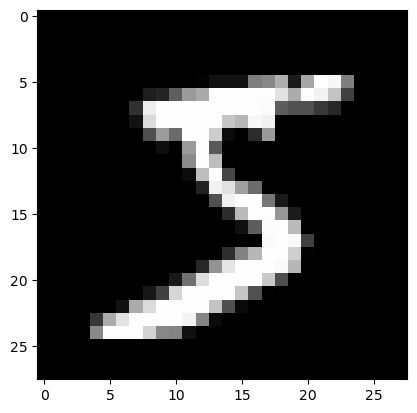

In [4]:
import matplotlib.pyplot as plt


print(mnist_y[0:10]) # 정답 불러오기
plt.imshow(mnist_x[0], cmap = 'gray') # 육만장 중에 한장을 불러오기

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


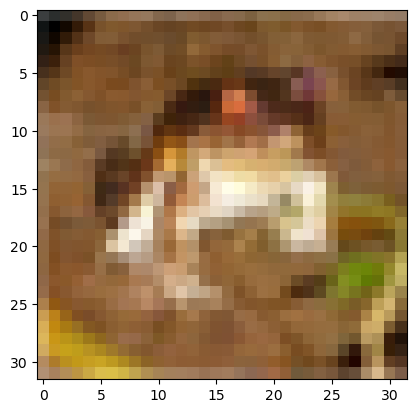

In [6]:
import matplotlib.pyplot as plt


print(cifar_y[0:10]) # 정답 불러오기
plt.imshow(cifar_x[0]) # 육만장 중에 한장을 불러오기

# 2. 차원 확인

In [7]:
import numpy as np

d1 = np.array([1,2,3,4,5])
print(d1.shape)

d2 = np.array([d1,d1,d1,d1])
print(d2.shape)

d3 = np.array([d2,d2,d2])
print(d3.shape)

d4 = np.array([d3, d3])
print(d4.shape)

(5,)
(4, 5)
(3, 4, 5)
(2, 3, 4, 5)


In [8]:
print(mnist_y.shape)
print(cifar_y.shape)

(60000,)
(50000, 1)


In [13]:
x1 = np.array([1,2,3,4,5])
print(x1.shape)
print(mnist_y[0:7])
print(mnist_y[0:7].shape) # 쭉 있는 형태

x2 = np.array([[1,2,3,4,5]])
print(x2.shape)

x3 = np.array([[1], [2], [3], [4], [5]])
print(x3.shape)
print(cifar_y[0:5])
print(cifar_y[0:5].shape)

(5,)
[5 0 4 1 9 2 1]
(7,)
(1, 5)
(5, 1)
[[6]
 [9]
 [9]
 [4]
 [1]]
(5, 1)


# Flatten Layer을 활용한 이미지 학습

### with reshape

In [16]:
import pandas as pd

In [17]:
(features, label), _ = tf.keras.datasets.mnist.load_data()
print(features.shape, label.shape)

features = features.reshape(60000, 784)
label = pd.get_dummies(label)
print(features.shape, label.shape)

(60000, 28, 28) (60000,)
(60000, 784) (60000, 10)


In [20]:
# 모델 만들기
X = tf.keras.layers.Input(shape = [784])
H = tf.keras.layers.Dense(84, activation = 'swish')(X)
Y = tf.keras.layers.Dense(10, activation = 'softmax')(H)
model = tf.keras.models.Model(X , Y)
model.compile(loss = 'categorical_crossentropy', metrics = 'accuracy')

In [21]:
# 모델 학습하기
model.fit(features, label, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.5513 - accuracy: 0.8568
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5161 - accuracy: 0.9210
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4358 - accuracy: 0.9358
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3769 - accuracy: 0.9430
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3435 - accuracy: 0.9480
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3227 - accuracy: 0.9509
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3146 - accuracy: 0.9522
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3026 - accuracy: 0.9555
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2981 - accuracy: 0.9570
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.282

In [22]:
# 모델 이용하기
pred = model.predict(features[0:5])
pd.DataFrame(pred).round(2)

1/1 [==============================] - 0s 215ms/step


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
label[0:5]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


## with flatten

In [30]:
(features, label), _ = tf.keras.datasets.mnist.load_data()
print(features.shape, label.shape)

label = pd.get_dummies(label)
print(features.shape, label.shape)   # 이미지 상태 그대로 feature를 학습해보자

(60000, 28, 28) (60000,)
(60000, 28, 28) (60000, 10)


In [31]:
X = tf.keras.layers.Input(shape = [28, 28])
H = tf.keras.layers.Flatten()(X) # 픽셀을 한 줄로 피는 과정
H = tf.keras.layers.Dense(84, activation = 'swish')(H)  # 픽셀들을 가지고 새로운 특징 84개를 찾았고 이 특징으로 10개의 클래스로 분류를 하였다. 
Y = tf.keras.layers.Dense(10, activation = 'softmax')(H)
model1 = tf.keras.models.Model(X , Y)
model1.compile(loss = 'categorical_crossentropy', metrics = 'accuracy')

In [32]:
model1.fit(features, label, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.0964 - accuracy: 0.8555
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5043 - accuracy: 0.9211
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4168 - accuracy: 0.9332
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3854 - accuracy: 0.9401
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3596 - accuracy: 0.9453
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3392 - accuracy: 0.9500
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3243 - accuracy: 0.9517
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3137 - accuracy: 0.9521
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3044 - accuracy: 0.9553
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.290

In [33]:
pred = model1.predict(features[0:5])
pd.DataFrame(pred).round(2)

1/1 [==============================] - 0s 147ms/step


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
label[0:5]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


# Convolution 
- 특정한 패턴의 특징이 어디서 나타나는지를 확인하는 도구

- 1. 필터셋을 몇 개 사용할 것인가
- 2. 필터셋의 사이즈를 얼마로 할 것인가
- 3. 3차원으로 데이터를 준비해주어야한다.

# filter
- 1. 필터셋은 3차원 형태로 된 가중치의 모음 ( 개별 데이터 셋 하나가 3차원이다. )    
      픽셀 하나 --> 필터  --> 특징맵 생성 --> 필터 -- > 6개의 특징맵이 생긴다.
- 2. 필터셋 하나는 앞선 레이어의 결과인 "특징맵" 전체를 본다. 
- 3. 필터셋 개수만큼 특징맵을 만든다.

# Convolution Layer

In [36]:
# 데이터 준비하기
(features, label), _ = tf.keras.datasets.mnist.load_data()
print(features.shape, label.shape)

features = features.reshape(60000, 28, 28 ,1)
label = pd.get_dummies(label)
print(features.shape, label.shape)

(60000, 28, 28) (60000,)
(60000, 28, 28, 1) (60000, 10)


In [37]:
# 모델을 만들기

X = tf.keras.layers.Input(shape = [28, 28, 1])
H = tf.keras.layers.Conv2D(3, kernel_size = 5, activation = 'swish')(X)
H = tf.keras.layers.Conv2D(6, kernel_size = 5, activation = 'swish')(H)
H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(84, activation = 'swish')(H)
Y = tf.keras.layers.Dense(10, activation = 'softmax')(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss = 'categorical_crossentropy', metrics = 'accuracy')

In [38]:
# 모델 학습하기
model.fit(features, label, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 52s 27ms/step - loss: 0.7866 - accuracy: 0.9234
Epoch 2/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0982 - accuracy: 0.9738
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0658 - accuracy: 0.9811
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0511 - accuracy: 0.9865
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0419 - accuracy: 0.9891
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0372 - accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0307 - accuracy: 0.9924
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0265 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0279 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 20s 11m

In [39]:
# 모델 이용하기
pred = model.predict(features[0:5])
pd.DataFrame(pred).round(2)

1/1 [==============================] - 0s 163ms/step


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
label[0:5]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


In [41]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 3)         78        
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 6)         456       
                                                                 
 flatten_3 (Flatten)         (None, 2400)              0         
                                                                 
 dense_10 (Dense)            (None, 84)                201684    
                                                                 
 dense_11 (Dense)            (None, 10)                850       
                                                                 
Total params: 203,068
Trainable params: 203,068
Non-trainab

# Pooling layer

In [42]:
# 데이터 준비하기
(features, label), _ = tf.keras.datasets.mnist.load_data()
print(features.shape, label.shape)

features = features.reshape(60000, 28, 28 ,1)
label = pd.get_dummies(label)
print(features.shape, label.shape)

(60000, 28, 28) (60000,)
(60000, 28, 28, 1) (60000, 10)


In [43]:
# CNN 모델을 만들기

X = tf.keras.layers.Input(shape = [28, 28, 1])

H = tf.keras.layers.Conv2D(3, kernel_size = 5, activation = 'swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(6, kernel_size = 5, activation = 'swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(84, activation = 'swish')(H)
Y = tf.keras.layers.Dense(10, activation = 'softmax')(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss = 'categorical_crossentropy', metrics = 'accuracy')

In [44]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 3)         78        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 3)        0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 6)           456       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 6)          0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 96)                0   

In [45]:
# 모델 학습하기
model.fit(features, label, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 1.3810 - accuracy: 0.8747
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1558 - accuracy: 0.9556
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1134 - accuracy: 0.9671
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0971 - accuracy: 0.9719
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0888 - accuracy: 0.9742
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0845 - accuracy: 0.9760
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0797 - accuracy: 0.9772
Epoch 8/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0788 - accuracy: 0.9781
Epoch 9/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0765 - accuracy: 0.9785
Epoch 10/10
1875/1875 [==============================] - 16s 8ms/step - l

In [46]:
# 모델 이용하기
pred = model.predict(features[0:5])
pd.DataFrame(pred).round(2)

1/1 [==============================] - 0s 93ms/step


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.7,0.0,0.3,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [47]:
label[0:5]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


# LeNet 5 모델 만들기

###  MNIST 데이터 셋

In [48]:
# 데이터 준비하기
(features, label), _ = tf.keras.datasets.mnist.load_data()
features = features.reshape(60000, 28, 28 ,1)
label = pd.get_dummies(label)
print(features.shape, label.shape)

(60000, 28, 28) (60000,)
(60000, 28, 28, 1) (60000, 10)


In [49]:
# 모델을 만들기

X = tf.keras.layers.Input(shape = [28, 28, 1])

H = tf.keras.layers.Conv2D(6, kernel_size = 5, padding = 'same', activation = 'swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(6, kernel_size = 5, activation = 'swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation = 'swish')(H)
H = tf.keras.layers.Dense(84, activation = 'swish')(H)
Y = tf.keras.layers.Dense(10, activation = 'softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss = 'categorical_crossentropy', metrics = 'accuracy')

In [50]:
# 모델 학습하기
model.fit(features, label, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4793 - accuracy: 0.9154
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1098 - accuracy: 0.9694
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0882 - accuracy: 0.9773
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0780 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0782 - accuracy: 0.9803
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0744 - accuracy: 0.9822
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0723 - accuracy: 0.9823
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0767 - accuracy: 0.9830
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0723 - accuracy: 0.9827
Epoch 10/10
1875/1875 [==============================] - 19s 10m

### Ci_far10 데이터셋

In [52]:
# 데이터 준비하기
(features, label), _ = tf.keras.datasets.cifar10.load_data()
print(features.shape, label.shape)

label = pd.get_dummies(label.reshape(50000))
print(features.shape, label.shape)

(50000, 32, 32, 3) (50000, 1)
(50000, 32, 32, 3) (50000, 10)


In [53]:
# 모델을 만들기

X = tf.keras.layers.Input(shape = [32, 32, 3])

H = tf.keras.layers.Conv2D(6, kernel_size = 5, activation = 'swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(6, kernel_size = 5, activation = 'swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation = 'swish')(H)
H = tf.keras.layers.Dense(84, activation = 'swish')(H)
Y = tf.keras.layers.Dense(10, activation = 'softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss = 'categorical_crossentropy', metrics = 'accuracy')

In [54]:
model.fit(features, label, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 21s 13ms/step - loss: 2.3245 - accuracy: 0.1608
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.8624 - accuracy: 0.3121
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.6987 - accuracy: 0.3801
Epoch 4/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.6162 - accuracy: 0.4125
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.5764 - accuracy: 0.4298
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.5478 - accuracy: 0.4425
Epoch 7/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.5243 - accuracy: 0.4524
Epoch 8/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.5094 - accuracy: 0.4591
Epoch 9/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.4992 - accuracy: 0.4654
Epoch 10/10
1563/1563 [==============================] - 67s 43m